# 06_UAV_Comparison
In diesem Jupyter Notebook werden Statistiken und Visualisierungen aus Daten der Punktwolken und der Metashape Reports generiert.

Die Daten basieren auf Bildern folgender Aufnahmedaten und UAV's:

- DJI Phantom 4 Pro V2 (24.03.2025)
- DJI Mini 3 Pro (26.03.2025)

### Import der Libraries

In [1]:
import pandas as pd
import glob
import os
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import laspy
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import re
import traceback

### Definition der Grundlagedaten

In [2]:
# CSV-Verzeichnis
csv_dir = "D:\\BTh11_Asuwertung_PC\\fhnw_code\\BTh11_Trieblaengenwachstum\\06_UAV_Comparison\\60_BaseData\\CSV"
print("Daten in CSV-Verzeichnis:", os.listdir(csv_dir))

# # PointCloud-Verzeichnis auf HDD
# pc_hdd_dir = "F:\\530_PointClouds_UAV"
# print("Daten in PointCloud-Verzeichnis (HDD):", os.listdir(pc_hdd_dir))

# PointCloud-Verzeichnis 
pc_dir = "D:\\BTh11_Asuwertung_PC\\fhnw_code\\BTh11_Trieblaengenwachstum\\06_UAV_Comparison\\60_BaseData\\PointCloud"
print("Daten in PointCloud-Verzeichnis:", os.listdir(pc_dir))


FileNotFoundError: [WinError 3] Das System kann den angegebenen Pfad nicht finden: 'D:\\BTh11_Asuwertung_PC\\fhnw_code\\BTh11_Trieblaengenwachstum\\06_UAV_Comparison\\60_BaseData\\CSV'

## 2. Analyse Punktwolken (clipped) 
Die Punkwolken werden aufgrund der Attribute analysiert, um eine Erkenntnis aus den verschiedenen UAV's zu erhalten.

### 2.1 Histogramm der Confidence-Werte der Punktwolken in Kategorien
In dieser Visualisierung werden alle Punkte der Punktwolken im Grundlagenverzeichnis "06_UAV_Comparison\60_BaseData\PointCloud" eingelesen und in Bezug auf das Attribut "confidence" in Kategorien eingeteilt. Pro Kategorie (1 - >12) werden die normierten Anteile pro UAV dargestellt.

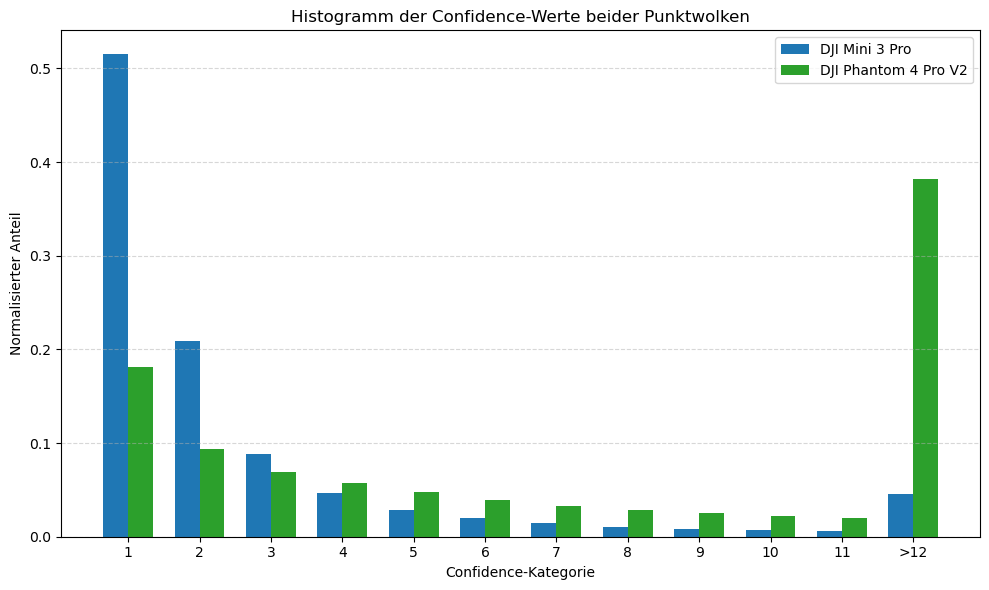

In [ ]:
# Pfade zu den beiden Punktwolken (LAS-Dateien)
djiphantom4prov2 = "D:\\BTh11_Asuwertung_PC\\fhnw_code\\BTh11_Trieblaengenwachstum\\06_UAV_Comparison\\60_BaseData\\PointCloud\\20250324_DJIPhantom4ProV2_Kirsche_clipped.las"
djimini3pro = "D:\\BTh11_Asuwertung_PC\\fhnw_code\\BTh11_Trieblaengenwachstum\\06_UAV_Comparison\\60_BaseData\\PointCloud\\20250326_DJIMini3Pro_Kirsche_clipped.las"

# Dateien pr\üfen
if not os.path.exists(djimini3pro):
    raise FileNotFoundError(f"Datei nicht gefunden: {djimini3pro}")
if not os.path.exists(djiphantom4prov2):
    raise FileNotFoundError(f"Datei nicht gefunden: {djiphantom4prov2}")

# Bins definieren: 1–12, letzte Kategorie >12
bins = list(np.arange(1, 13)) + [np.inf]
bin_labels = [str(i) for i in range(1, 12)] + [">12"]

# Funktion zur Berechnung des normalisierten Histogramms der Confidence-Werte
def compute_confidence_histogram(file_path):
    las = laspy.read(file_path)
    # Prüfen, ob das Feld "confidence" vorhanden ist
    if "confidence" not in las.point_format.dimension_names:
        raise ValueError(f"Feld 'confidence' fehlt in Datei: {file_path}")
    confidence = las['confidence']
    counts, _ = np.histogram(confidence, bins=bins)
    total = np.sum(counts)
    norm_counts = counts / total if total > 0 else np.zeros_like(counts)
    return norm_counts

# Histogramme für beide Punktwolken berechnen
hist1 = compute_confidence_histogram(djimini3pro)
hist2 = compute_confidence_histogram(djiphantom4prov2)

# Plot vorbereiten: gruppiertes Balkendiagramm
x = np.arange(len(bin_labels))  # Positionen der Kategorien
width = 0.35  # Balkenbreite

fig, ax = plt.subplots(figsize=(10, 6))

# Balken für die erste Punktwolke
ax.bar(x - width/2, hist1, width, label="DJI Mini 3 Pro", color="#1f77b4")
# Balken für die zweite Punktwolke
ax.bar(x + width/2, hist2, width, label="DJI Phantom 4 Pro V2", color="#2ca02c")

# Achsenbeschriftung und Layout
ax.set_xticks(x)
ax.set_xticklabels(bin_labels)
ax.set_xlabel("Confidence-Kategorie")
ax.set_ylabel("Normalisierter Anteil")
ax.set_title("Histogramm der Confidence-Werte beider Punktwolken")
ax.legend(loc="upper right")
ax.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

### 2.2 Histogramm der Confidence-Werte der Punktwolken (kontinuierlich)
In dieser Visualisierung werden alle Punkte der Punktwolken im Grundlagenverzeichnis "06_UAV_Comparison\60_BaseData\PointCloud" eingelesen und in Bezug auf das Attribut "confidence" in Kategorien eingeteilt. Pro Wert werden die normierten Anteile pro UAV dargestellt.
Zudem werden noch die maximalen Confidence-Werte der einzelnen UAV's auf dem Graphen dargestellt, da diese aufgrund der geringen Anzahl Punkte im Verhältnis zu anderen Werten, kaum erkennbar sind.

DJI Mini 3 Pro Confidence - Min: 1 Max: 90
DJI Phantom 4 Pro V2 Confidence - Min: 1 Max: 140


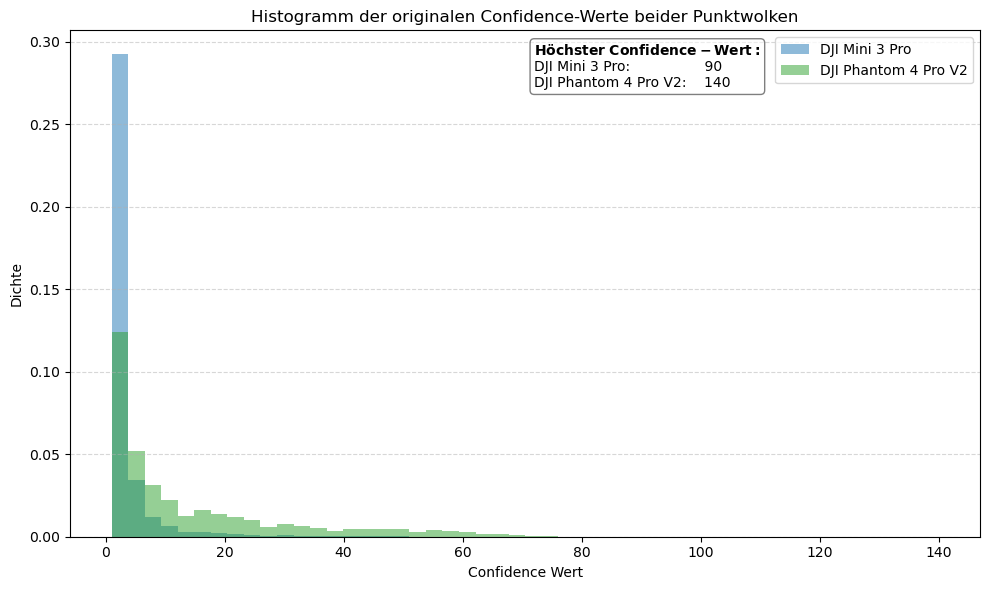

In [ ]:
# Pfade zu den beiden Punktwolken (LAS-Dateien)
djiphantom4prov2 = "D:\\BTh11_Asuwertung_PC\\fhnw_code\\BTh11_Trieblaengenwachstum\\06_UAV_Comparison\\60_BaseData\\PointCloud\\20250324_DJIPhantom4ProV2_Kirsche_clipped.las"
djimini3pro = "D:\\BTh11_Asuwertung_PC\\fhnw_code\\BTh11_Trieblaengenwachstum\\06_UAV_Comparison\\60_BaseData\\PointCloud\\20250326_DJIMini3Pro_Kirsche_clipped.las"

# Dateien prüfen
if not os.path.exists(djimini3pro):
    raise FileNotFoundError(f"Datei nicht gefunden: {djimini3pro}")
if not os.path.exists(djiphantom4prov2):
    raise FileNotFoundError(f"Datei nicht gefunden: {djiphantom4prov2}")

# Funktion, um die Confidence-Werte aus einer LAS-Datei zu extrahieren
def get_confidence_values(file_path):
    las = laspy.read(file_path)
    if "confidence" not in las.point_format.dimension_names:
        raise ValueError(f"Feld 'confidence' fehlt in Datei: {file_path}")
    return las['confidence']

# Confidence-Werte für beide Punktwolken extrahieren
djimini3pro_confidence = get_confidence_values(djimini3pro)
djiphantom4prov2_confidence = get_confidence_values(djiphantom4prov2)

# Bestimme die minimalen und maximalen Confidence-Werte für jede Punktwolke
min_conf1, max_conf1 = np.min(djimini3pro_confidence), np.max(djimini3pro_confidence)
min_conf2, max_conf2 = np.min(djiphantom4prov2_confidence), np.max(djiphantom4prov2_confidence)

# Ausgabe der Werte in der Konsole
print("DJI Mini 3 Pro Confidence - Min:", min_conf1, "Max:", max_conf1)
print("DJI Phantom 4 Pro V2 Confidence - Min:", min_conf2, "Max:", max_conf2)

# Optional: Bestimme den gemeinsamen Wertebereich für ein einheitliches Binning
min_conf = min(min_conf1, min_conf2)
max_conf = max(max_conf1, max_conf2)
bins = np.linspace(min_conf, max_conf, 51)  # 50 Bins

# Plot vorbereiten: Histogramm der originalen Confidence-Werte
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(djimini3pro_confidence, bins=bins, density=True, alpha=0.5, label="DJI Mini 3 Pro", color="#1f77b4")
ax.hist(djiphantom4prov2_confidence, bins=bins, density=True, alpha=0.5, label="DJI Phantom 4 Pro V2", color="#2ca02c")

ax.set_xlabel("Confidence Wert")
ax.set_ylabel("Dichte")
ax.set_title("Histogramm der originalen Confidence-Werte beider Punktwolken")
ax.legend(loc="upper right")
ax.grid(axis="y", linestyle="--", alpha=0.5)

# Textbox mit den min/max-Werten in die Grafik einfügen (oben links)
textstr = (
    r"$\mathbf{Höchster\ Confidence-Wert:}$" "\n"
    f"DJI Mini 3 Pro:                 {max_conf1:.0f}\n"
    f"DJI Phantom 4 Pro V2:    {max_conf2:.0f}"
)
props = dict(boxstyle="round", facecolor="white", alpha=0.5)
ax.text(0.51, 0.9752, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment="top", bbox=props)

plt.tight_layout()
plt.show()


In [3]:
# Pfade zu den beiden Punktwolken (LAS-Dateien)
djiphantom4prov2 = "D:\\BTh11_Asuwertung_PC\\fhnw_code\\BTh11_Trieblaengenwachstum\\06_UAV_Comparison\\60_BaseData\\PointCloud\\20250324_DJIPhantom4ProV2_Kirsche_clipped.las"
djimini3pro = "D:\\BTh11_Asuwertung_PC\\fhnw_code\\BTh11_Trieblaengenwachstum\\06_UAV_Comparison\\60_BaseData\\PointCloud\\20250326_DJIMini3Pro_Kirsche_clipped.las"

# Dateien prüfen
if not os.path.exists(djimini3pro):
    raise FileNotFoundError(f"Datei nicht gefunden: {djimini3pro}")
if not os.path.exists(djiphantom4prov2):
    raise FileNotFoundError(f"Datei nicht gefunden: {djiphantom4prov2}")

# Funktion, um die Confidence-Werte aus einer LAS-Datei zu extrahieren
def get_confidence_values(file_path):
    las = laspy.read(file_path)
    if "confidence" not in las.point_format.dimension_names:
        raise ValueError(f"Feld 'confidence' fehlt in Datei: {file_path}")
    return las['confidence']

# Confidence-Werte für beide Punktwolken extrahieren
djimini3pro_confidence = get_confidence_values(djimini3pro)
djiphantom4prov2_confidence = get_confidence_values(djiphantom4prov2)

# Bestimme die minimalen und maximalen Confidence-Werte für jede Punktwolke
min_conf1, max_conf1 = np.min(djimini3pro_confidence), np.max(djimini3pro_confidence)
min_conf2, max_conf2 = np.min(djiphantom4prov2_confidence), np.max(djiphantom4prov2_confidence)

# Ausgabe der Werte in der Konsole
print("DJI Mini 3 Pro Confidence - Min:", min_conf1, "Max:", max_conf1)
print("DJI Phantom 4 Pro V2 Confidence - Min:", min_conf2, "Max:", max_conf2)

# Optional: Bestimme den gemeinsamen Wertebereich für ein einheitliches Binning
min_conf = min(np.min(djimini3pro_confidence), np.min(djiphantom4prov2_confidence))
max_conf = max(np.max(djimini3pro_confidence), np.max(djiphantom4prov2_confidence))
bins = np.linspace(min_conf, max_conf, 51)  # 50 Bins

# Berechne Histogramme (mit density=True, um normierte Dichten zu erhalten)
hist_phantom, edges = np.histogram(djiphantom4prov2_confidence, bins=bins, density=True)
hist_mini, _ = np.histogram(djimini3pro_confidence, bins=bins, density=True)

# Berechne die Bin-Zentren
bin_centers = (edges[:-1] + edges[1:]) / 2

# Erweiterte Arrays erstellen, sodass die Linie bis zum Nullpunkt geht:
# Füge links den linken Rand (edges[0]) mit y=0 und rechts den rechten Rand (edges[-1]) mit y=0 hinzu.
x_extended = np.concatenate(([edges[0]], bin_centers, [edges[-1]]))
y_extended_phantom = np.concatenate(([0], hist_phantom, [0]))
y_extended_mini = np.concatenate(([0], hist_mini, [0]))

# Plot vorbereiten: Linien-Histogramm
fig, ax = plt.subplots(figsize=(10, 6))

ax.step(x_extended, y_extended_mini, label="DJI Mini 3 Pro", color="#1f77b4", linewidth=2, where="mid")
ax.step(x_extended, y_extended_phantom, label="DJI Phantom 4 Pro V2", color="#2ca02c", linewidth=2, where="mid")

ax.set_xlabel("Confidence Wert")
ax.set_ylabel("Dichte")
ax.set_title("Histogramm der originalen Confidence-Werte beider Punktwolken")
ax.legend(loc="upper right")
ax.grid(axis="y", linestyle="--", alpha=0.5)

# Textbox mit den min/max-Werten in die Grafik einfügen (oben links)
textstr = (
    r"$\mathbf{Höchster\ Confidence-Wert:}$" "\n"
    f"DJI Mini 3 Pro:                 {max_conf1:.0f}\n"
    f"DJI Phantom 4 Pro V2:    {max_conf2:.0f}"
)
props = dict(boxstyle="round", facecolor="white", alpha=0.5)
ax.text(0.51, 0.9752, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment="top", bbox=props)

plt.tight_layout()
plt.show()


FileNotFoundError: Datei nicht gefunden: D:\BTh11_Asuwertung_PC\fhnw_code\BTh11_Trieblaengenwachstum\06_UAV_Comparison\60_BaseData\PointCloud\20250326_DJIMini3Pro_Kirsche_clipped.las

### 2.3 Histogramm der Confidence-Werte der Punktwolken mit einer logarithmischen Skala - normiert (kontinuierlich)
In dieser Visualisierung werden alle Punkte der Punktwolken im Grundlagenverzeichnis "06_UAV_Comparison\60_BaseData\PointCloud" eingelesen und in Bezug auf das Attribut "confidence" in Kategorien eingeteilt. Pro Wert werden die normierten Anteile pro UAV in einer logarithsmischen Skala dargestellt.


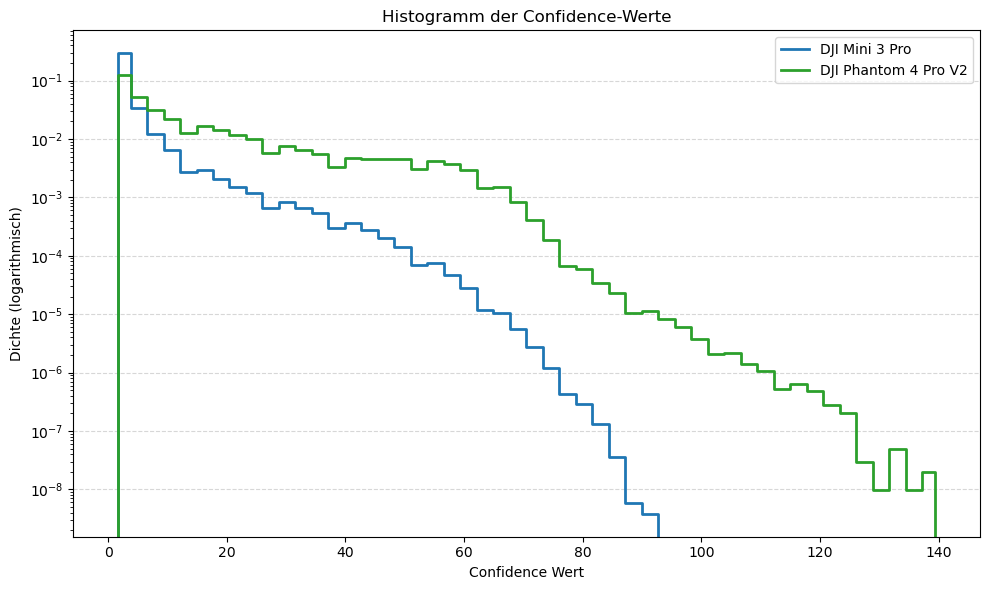

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import laspy

# Pfade zu den beiden Punktwolken (LAS-Dateien)
djiphantom4prov2 = "D:\\BTh11_Asuwertung_PC\\fhnw_code\\BTh11_Trieblaengenwachstum\\06_UAV_Comparison\\60_BaseData\\PointCloud\\20250324_DJIPhantom4ProV2_Kirsche_clipped.las"
djimini3pro = "D:\\BTh11_Asuwertung_PC\\fhnw_code\\BTh11_Trieblaengenwachstum\\06_UAV_Comparison\\60_BaseData\\PointCloud\\20250326_DJIMini3Pro_Kirsche_clipped.las"

# Dateien prüfen
if not os.path.exists(djimini3pro):
    raise FileNotFoundError(f"Datei nicht gefunden: {djimini3pro}")
if not os.path.exists(djiphantom4prov2):
    raise FileNotFoundError(f"Datei nicht gefunden: {djiphantom4prov2}")

# Funktion, um die Confidence-Werte aus einer LAS-Datei zu extrahieren
def get_confidence_values(file_path):
    las = laspy.read(file_path)
    if "confidence" not in las.point_format.dimension_names:
        raise ValueError(f"Feld 'confidence' fehlt in Datei: {file_path}")
    return las['confidence']

# Confidence-Werte für beide Punktwolken extrahieren
djimini3pro_confidence = get_confidence_values(djimini3pro)
djiphantom4prov2_confidence = get_confidence_values(djiphantom4prov2)

# Optional: Bestimme den gemeinsamen Wertebereich für ein einheitliches Binning
min_conf = min(np.min(djimini3pro_confidence), np.min(djiphantom4prov2_confidence))
max_conf = max(np.max(djimini3pro_confidence), np.max(djiphantom4prov2_confidence))
bins = np.linspace(min_conf, max_conf, 51)  # 50 Bins

# Berechne Histogramme (mit density=True, um normierte Dichten zu erhalten)
hist_phantom, edges = np.histogram(djiphantom4prov2_confidence, bins=bins, density=True)
hist_mini, _ = np.histogram(djimini3pro_confidence, bins=bins, density=True)

# Berechne die Bin-Zentren
bin_centers = (edges[:-1] + edges[1:]) / 2

# Erweiterte Arrays erstellen, sodass die Linie bis zum Nullpunkt geht:
# Füge links den linken Rand (edges[0]) mit y=0 und rechts den rechten Rand (edges[-1]) mit y=0 hinzu.
x_extended = np.concatenate(([edges[0]], bin_centers, [edges[-1]]))
y_extended_phantom = np.concatenate(([0], hist_phantom, [0]))
y_extended_mini = np.concatenate(([0], hist_mini, [0]))

# Plot vorbereiten: Linien-Histogramm
fig, ax = plt.subplots(figsize=(10, 6))

ax.step(x_extended, y_extended_mini, label="DJI Mini 3 Pro", color="#1f77b4", linewidth=2, where="mid")
ax.step(x_extended, y_extended_phantom, label="DJI Phantom 4 Pro V2", color="#2ca02c", linewidth=2, where="mid")

ax.set_xlabel("Confidence Wert")
ax.set_ylabel("Dichte (logarithmisch)")
ax.set_title("Histogramm der Confidence-Werte")
ax.legend(loc="upper right")
ax.grid(axis="y", linestyle="--", alpha=0.5)

# Umstellung auf logarithmische y-Achse
ax.set_yscale("log")

plt.tight_layout()
plt.show()


### 2.4 Histogramm der Confidence-Werte der Punktwolken mit einer logarithmischen Skala - Anzahl Punkte(kontinuierlich)
In dieser Visualisierung werden alle Punkte der Punktwolken im Grundlagenverzeichnis "06_UAV_Comparison\60_BaseData\PointCloud" eingelesen und in Bezug auf das Attribut "confidence" in Kategorien eingeteilt. Pro Wert werden die Anzahl Punkte pro UAV in einer logarithsmischen Skala dargestellt.


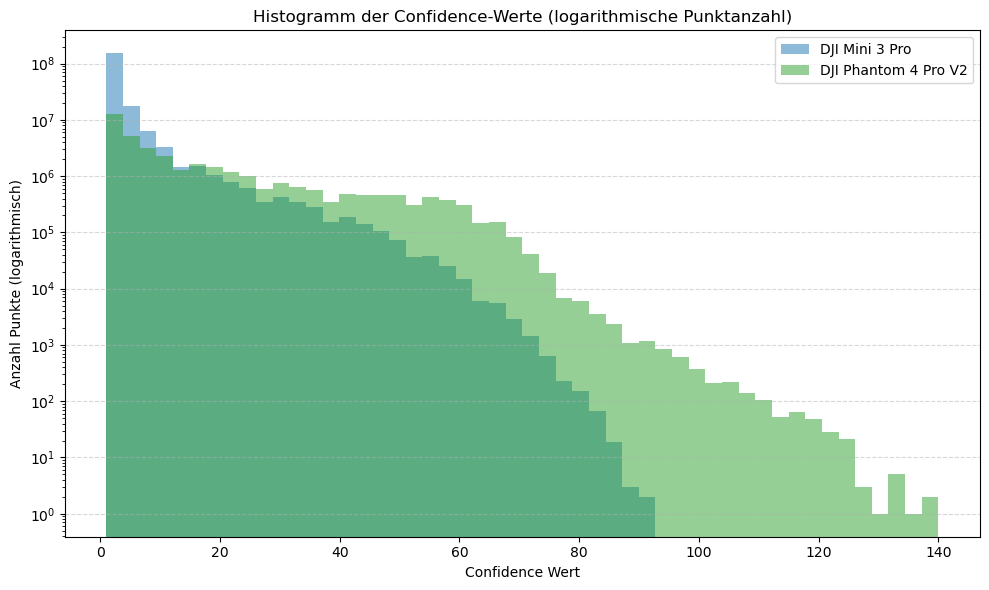

In [ ]:
# Pfade zu den beiden Punktwolken (LAS-Dateien)
djiphantom4prov2 = "D:\\BTh11_Asuwertung_PC\\fhnw_code\\BTh11_Trieblaengenwachstum\\06_UAV_Comparison\\60_BaseData\\PointCloud\\20250324_DJIPhantom4ProV2_Kirsche_clipped.las"
djimini3pro = "D:\\BTh11_Asuwertung_PC\\fhnw_code\\BTh11_Trieblaengenwachstum\\06_UAV_Comparison\\60_BaseData\\PointCloud\\20250326_DJIMini3Pro_Kirsche_clipped.las"

# Dateien prüfen
if not os.path.exists(djimini3pro):
    raise FileNotFoundError(f"Datei nicht gefunden: {djimini3pro}")
if not os.path.exists(djiphantom4prov2):
    raise FileNotFoundError(f"Datei nicht gefunden: {djiphantom4prov2}")

# Funktion, um die Confidence-Werte aus einer LAS-Datei zu extrahieren
def get_confidence_values(file_path):
    las = laspy.read(file_path)
    if "confidence" not in las.point_format.dimension_names:
        raise ValueError(f"Feld 'confidence' fehlt in Datei: {file_path}")
    return las['confidence']

# Confidence-Werte für beide Punktwolken extrahieren
djimini3pro_confidence = get_confidence_values(djimini3pro)
djiphantom4prov2_confidence = get_confidence_values(djiphantom4prov2)

# Optional: Bestimme den gemeinsamen Wertebereich für ein einheitliches Binning
min_conf = min(np.min(djimini3pro_confidence), np.min(djiphantom4prov2_confidence))
max_conf = max(np.max(djimini3pro_confidence), np.max(djiphantom4prov2_confidence))
bins = np.linspace(min_conf, max_conf, 51)  # 50 Bins

# Plot vorbereiten: Histogramm der originalen Confidence-Werte mit logarithmischer y-Achse
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(djimini3pro_confidence, bins=bins, alpha=0.5, label="DJI Mini 3 Pro", color="#1f77b4")
ax.hist(djiphantom4prov2_confidence, bins=bins, alpha=0.5, label="DJI Phantom 4 Pro V2", color="#2ca02c")

ax.set_xlabel("Confidence Wert")
ax.set_ylabel("Anzahl Punkte (logarithmisch)")
ax.set_title("Histogramm der Confidence-Werte (logarithmische Punktanzahl)")
ax.legend(loc="upper right")
ax.grid(axis="y", linestyle="--", alpha=0.5)

# Umstellung auf logarithmische y-Achse
ax.set_yscale("log")

plt.tight_layout()
plt.show()
